**Import the necessary packages**

In [15]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind
import re

**Load the data from the files**

In [2]:
# Load the subfiles into seperate dataframes
CharacterMetadata_df = pd.read_csv("MovieSummaries/character.metadata.tsv", sep="\t")
#df_character.columns = ["wiki_movie_id", "freebase_movie_id", "release_date", "character_name", "DOB", "gender", "height", "ethnicity", "actor_name", "actor_age", "freebase_map_1", "freebase_map_2", "freebase_map_3"]
CharacterMetadata_df_headers = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID'
]
CharacterMetadata_df.columns = CharacterMetadata_df_headers

MovieMetadata_df = pd.read_csv("MovieSummaries/movie.metadata.tsv", sep="\t")
#df_movie.columns = ["wiki_movie_id", "freebase_movie_id", "movie_name", "release_date", "box_office", "runtime", "languages", "countries", "genres"]
MovieMetadata_df_headers = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie name',
    'Movie release date',
    'Movie box office revenue',
    'Movie runtime',
    'Movie languages (Freebase ID:name tuples)',
    'Movie countries (Freebase ID:name tuples)',
    'Movie genres (Freebase ID:name tuples)'
]
MovieMetadata_df.columns = MovieMetadata_df_headers

names_df = pd.read_csv("MovieSummaries/name.clusters.txt", sep="\t")
names_df.columns = ['Character Types', 'Instances']

plot_summaries_df = pd.read_csv('MovieSummaries/plot_summaries.txt', sep='\t')
plot_summaries_df.columns = ['Wikipedia movie ID', 'Summaries']

# Display the data frames to have an idea of their structure
display(CharacterMetadata_df)
display(MovieMetadata_df)
display(names_df)
display(plot_summaries_df)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450663,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450664,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450665,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450666,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
...,...,...,...,...,...,...,...,...,...
81735,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81736,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81737,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81738,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


,Character Types,Instances
0,Stuart Little,/m/0k3wcx
1,Stuart Little,/m/0k3wbn
2,John Doe,/m/0jyg35
3,John Doe,/m/0k2_zn
4,Josh Framm,/m/0jt3p3
...,...,...
2660,John Rolfe,/m/0k5_ql
2661,John Rolfe,/m/02vd6vs
2662,Elizabeth Swann,/m/0k1xvz
2663,Elizabeth Swann,/m/0k1x_d


,Wikipedia movie ID,Summaries
0,31186339,The nation of Panem consists of a wealthy Capi...
1,20663735,Poovalli Induchoodan is sentenced for six yea...
2,2231378,"The Lemon Drop Kid , a New York City swindler,..."
3,595909,Seventh-day Adventist Church pastor Michael Ch...
4,5272176,The president is on his way to give a speech. ...
...,...,...
42297,34808485,"The story is about Reema , a young Muslim scho..."
42298,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42299,35102018,American Luthier focuses on Randy Parsons’ tra...
42300,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


**Get some df.value_counts() to see if some cleaning needs to be done**

In [3]:
print(CharacterMetadata_df['Actor date of birth'].value_counts(), '\n')
print(MovieMetadata_df['Movie release date'].value_counts(), '\n')
print(names_df['Character Types'].value_counts(), '\n')
print(plot_summaries_df['Wikipedia movie ID'].value_counts())

Actor date of birth
1908-05-30    791
1964          349
1950-06-16    333
1970          301
1892-01-18    299
             ... 
1927-05-25      1
1910-06-21      1
1949-01-15      1
1912-06-01      1
1868-09-06      1
Name: count, Length: 29494, dtype: int64 

Movie release date
2006          1011
2007           959
2008           949
2005           905
2004           826
              ... 
1987-11-02       1
1971-04-30       1
1909-12-13       1
1932-12-25       1
1992-05-21       1
Name: count, Length: 20389, dtype: int64 

Character Types
Daffy Duck         42
Porky Pig          38
Mickey Mouse       24
Bugs Bunny         20
Sherlock Holmes    18
                   ..
Little John         2
Truman Capote       2
Tommy Jarvis        2
Pugsley Addams      2
Jackie Robinson     2
Name: count, Length: 970, dtype: int64 

Wikipedia movie ID
31186339    1
12008306    1
25652572    1
33059372    1
5792097     1
           ..
30011044    1
2487720     1
8832396     1
9776999     1
6040782   

**Make the release dates of the movies to be a single year instead of YYYY-MM-DD**

In [4]:
MovieMetadata_df['Movie release date'] = MovieMetadata_df['Movie release date'].apply(
    lambda x: x[:4] if isinstance(x, str) and len(x) > 4 else x
)
print(MovieMetadata_df['Movie release date'].value_counts())

Movie release date
2008    2465
2006    2434
2007    2389
2009    2247
2005    2102
        ... 
1904       1
1893       1
1889       1
1888       1
1010       1
Name: count, Length: 130, dtype: int64


**Clean the actor ages**

In [ ]:
def change_age(age):
    if age < 0:
        age = -age
    
    if age > 103.0:
        age = np.NaN
        
    return age

CharacterMetadata_df['Actor age at movie release'] = CharacterMetadata_df['Actor age at movie release'].apply(
    #lambda x: x[-3:] if isinstance(x, str) and len(x) > 3 else x
    lambda x: change_age(x)
)

print(CharacterMetadata_df['Actor age at movie release'].value_counts())

<class 'numpy.float64'>
Actor age at movie release
31.0     8989
30.0     8938
28.0     8934
29.0     8826
32.0     8757
         ... 
94.0       11
96.0        7
97.0        3
99.0        2
103.0       2
Name: count, Length: 100, dtype: int64


**Find the movies that have the string 'World War' in their plot summaries and plot their yearly distribution**

Searching for substring: World War
Searching for substring: World war
Searching for substring: world war


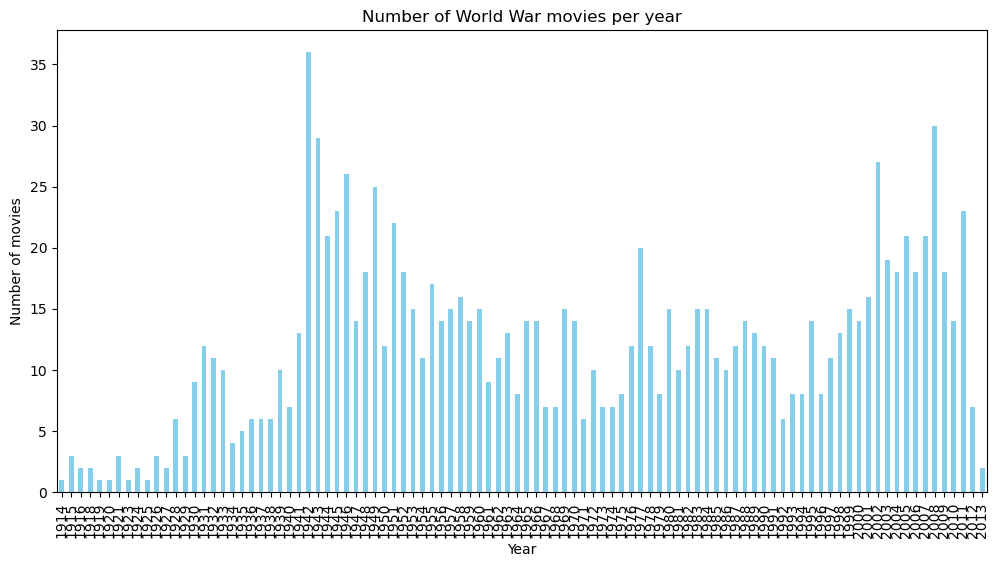

In [10]:
# Initialize empty DataFrame with columns
WW_movies_df = pd.DataFrame(columns=['Wikipedia movie ID', 'Summaries'])

# Initialize the strings that we are looking for
substrings = ['World War', 'World war', 'world war']

# Filter plot summaries for substrings
for sub in substrings:
    print(f"Searching for substring: {sub}")
    WW_movies_df = pd.concat([WW_movies_df, plot_summaries_df[plot_summaries_df['Summaries'].str.contains(sub, case=False)]], ignore_index=True)
WW_movies_df = WW_movies_df.drop_duplicates(subset=['Wikipedia movie ID'])    
#display(WW_movies_df)

# Merge with MovieMetadata_df to get additional info
WW_movies_df = WW_movies_df.merge(MovieMetadata_df, how='inner')

# Count the number of World War movies per year
WW_movies_per_year = WW_movies_df['Movie release date'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
WW_movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of World War movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()


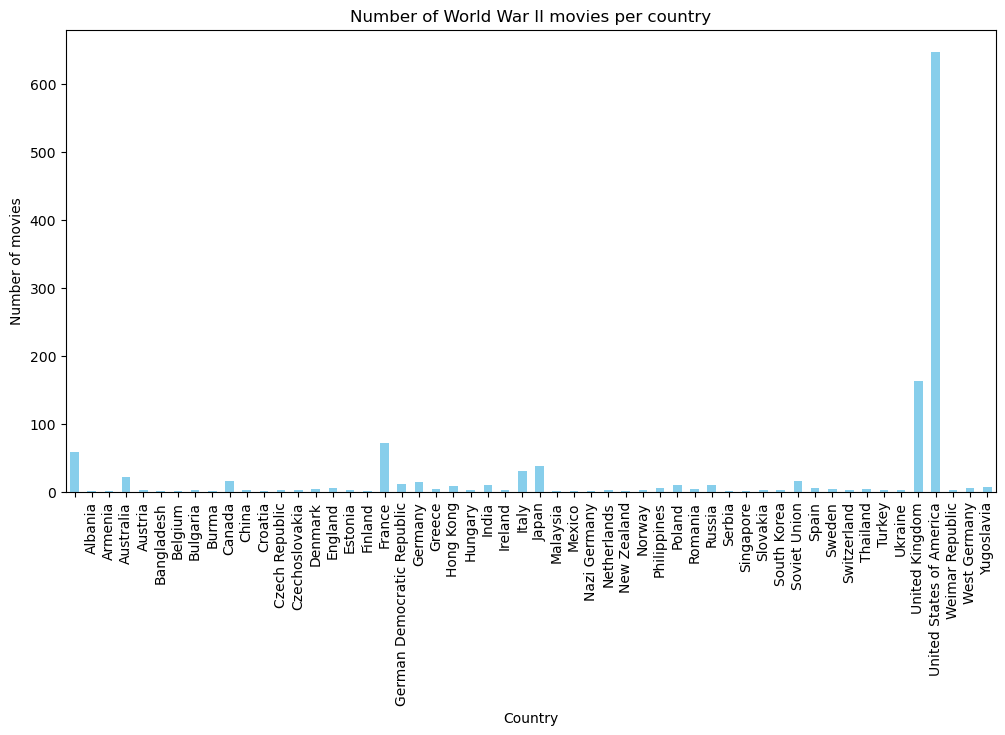

In [58]:
# Create function to find a certain string in certain characters
def find_country(s):
    try:
        start_idx = s.index(': "') + len(': "')
        end_idx = s.index('"', start_idx)
        #print(start_idx, end_idx)
        return s[start_idx:end_idx]
    except ValueError:
        return ""

# Count the number of World War movies per country
#print(type(WW2_movies_df['Movie countries (Freebase ID:name tuples)'].loc[3]))
#print(WW2_movies_df['Movie countries (Freebase ID:name tuples)'].loc[3])
WW_movies_df['Country'] = WW_movies_df['Movie countries (Freebase ID:name tuples)'].apply(lambda x: find_country(x))
#display(WW2_movies_df['Country'])
WW_movies_per_country = WW_movies_df['Country'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
WW_movies_per_country.plot(kind='bar', color='skyblue')
plt.title('Number of World War II movies per country')
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.show()

**Normalize by the number of movies made each year**

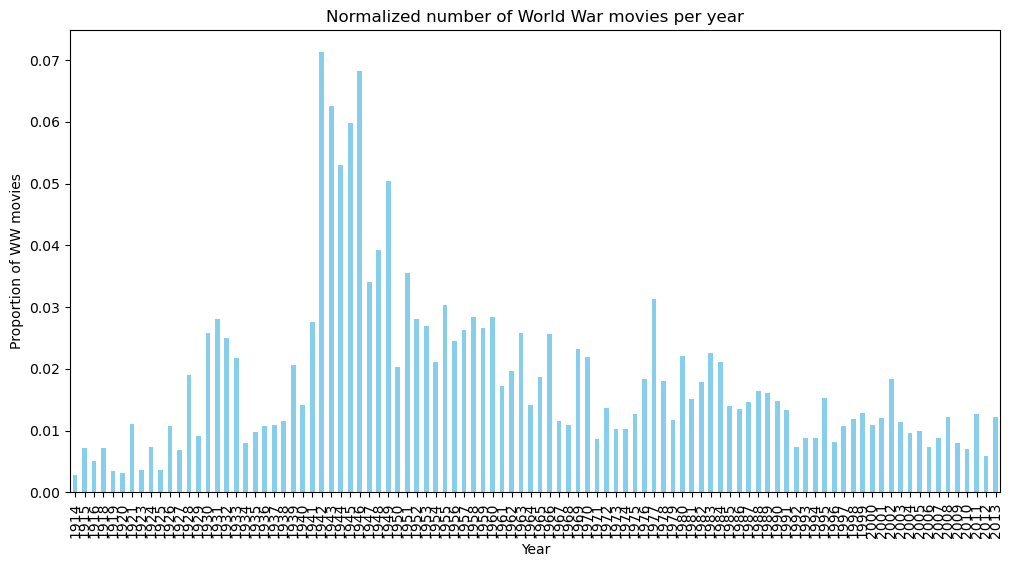

In [83]:
# Count the number of movies per year
movies_per_year = MovieMetadata_df['Movie release date'].value_counts().sort_index()

# Normalize by number of movies each year
WW_movies_per_year_normal = WW_movies_per_year/movies_per_year

# Filter the NaN parameters
WW_movies_per_year_normal = WW_movies_per_year_normal.dropna()
WW_movies_per_year_normal.index = WW_movies_per_year_normal.index.astype(int)

# Plotting
plt.figure(figsize=(12, 6))
WW_movies_per_year_normal.plot(kind='bar', color='skyblue')
plt.title('Normalized number of World War movies per year')
plt.xlabel('Year')
plt.ylabel('Proportion of WW movies')

# Set x-axis to display every third year
#plt.xticks(ticks=range(WW_movies_per_year_normal.index.min(), WW_movies_per_year_normal.index.max() + 1, 3), rotation=45)  # Rotate for readability

plt.show()
#print(WW_movies_per_year_normal.to_string())

**Find the number of movies with 'World War 2' or some kind of variation in their plot summaries and plot their yearly and coutry of production distribution**

In [18]:
# Initialize empty DataFrame with columns
WW2_movies_df = pd.DataFrame(columns=['Wikipedia movie ID', 'Summaries'])

# Initialize the strings that we are looking for
substrings_ww2 = ['World War II', 'World war II', 'world war II', 'World War 2', 'World war 2', 'world war 2']

# Filter plot summaries for substrings
for sub in substrings_ww2:
    print(f"Searching for substring: {sub}")
    WW2_movies_df = pd.concat([WW2_movies_df, plot_summaries_df[plot_summaries_df['Summaries'].str.contains(sub, case=False)]], ignore_index=True)
WW2_movies_df = WW2_movies_df.drop_duplicates(subset=['Wikipedia movie ID'])    
#display(WW_movies_df)

Searching for substring: World War II
Searching for substring: World war II
Searching for substring: world war II
Searching for substring: World War 2
Searching for substring: World war 2
Searching for substring: world war 2


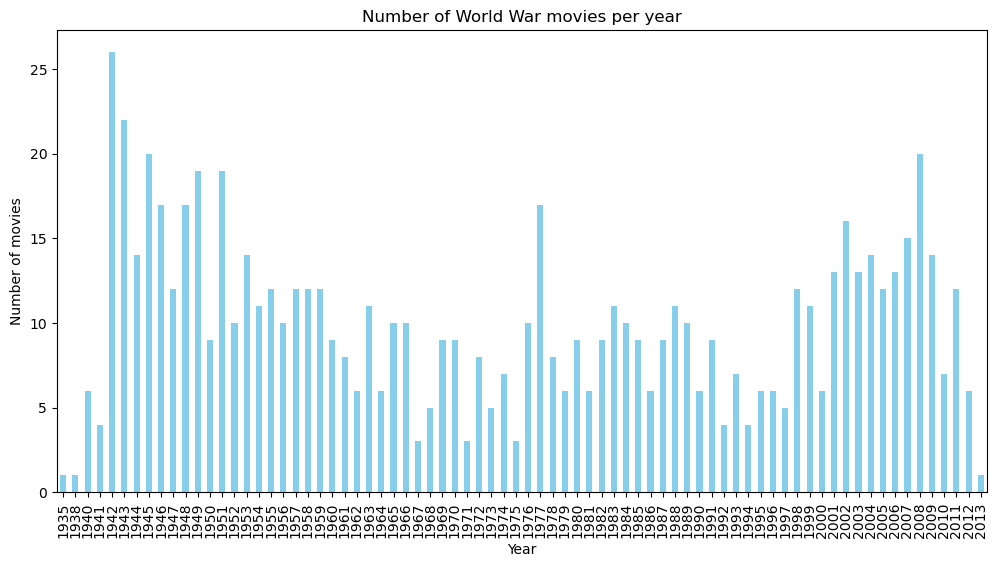

In [ ]:
# Merge with MovieMetadata_df to get additional info
WW2_movies_df = WW2_movies_df.merge(MovieMetadata_df, how='inner')

# Count the number of World War movies per year
WW2_movies_per_year = WW2_movies_df['Movie release date'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
WW2_movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of World War II movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

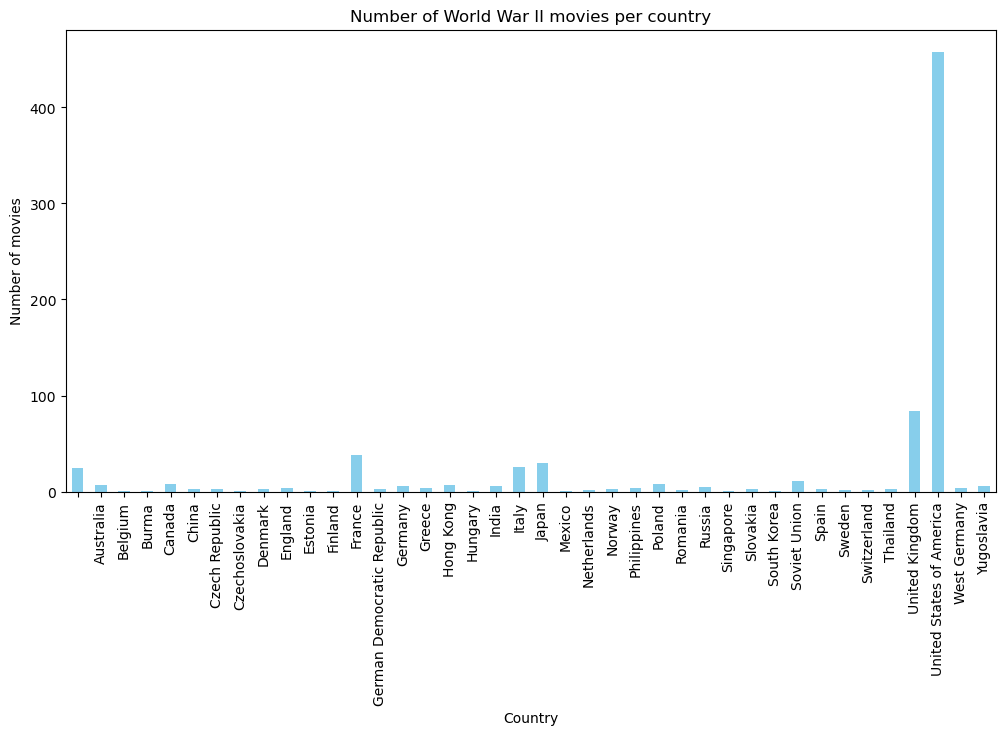

In [ ]:
# Create function to find a certain string in certain characters
def find_country(s):
    try:
        start_idx = s.index(': "') + len(': "')
        end_idx = s.index('"', start_idx)
        #print(start_idx, end_idx)
        return s[start_idx:end_idx]
    except ValueError:
        return ""

# Count the number of World War movies per country
#print(type(WW2_movies_df['Movie countries (Freebase ID:name tuples)'].loc[3]))
#print(WW2_movies_df['Movie countries (Freebase ID:name tuples)'].loc[3])
WW2_movies_df['Country'] = WW2_movies_df['Movie countries (Freebase ID:name tuples)'].apply(lambda x: find_country(x))
#display(WW2_movies_df['Country'])
WW2_movies_per_country = WW2_movies_df['Country'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
WW2_movies_per_country.plot(kind='bar', color='skyblue')
plt.title('Number of World War II movies per country')
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.show()

**Normalize the number of movies by the number of movies made that year**

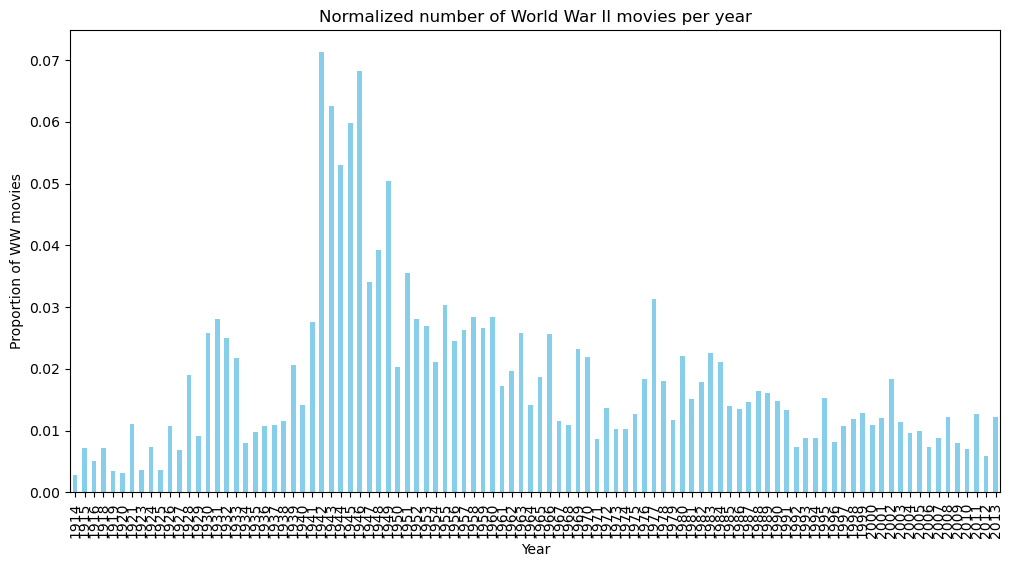

In [84]:
# Normalize by number of movies each year
WW2_movies_per_year_normal = WW_movies_per_year/movies_per_year

# Filter the NaN parameters
WW2_movies_per_year_normal = WW2_movies_per_year_normal.dropna()
WW2_movies_per_year_normal.index = WW2_movies_per_year_normal.index.astype(int)

# Plotting
plt.figure(figsize=(12, 6))
WW2_movies_per_year_normal.plot(kind='bar', color='skyblue')
plt.title('Normalized number of World War II movies per year')
plt.xlabel('Year')
plt.ylabel('Proportion of WW movies')

# Set x-axis to display every third year
#plt.xticks(ticks=range(WW_movies_per_year_normal.index.min(), WW_movies_per_year_normal.index.max() + 1, 3), rotation=45)  # Rotate for readability

plt.show()
#print(WW_movies_per_year_normal.to_string())